# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [3]:
print(tf.config.list_physical_devices('GPU'))

NameError: name 'tf' is not defined

## Data Preprocessing

### Training Image preprocessing

In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [10]:
!nvidia-smi

Sun Apr  6 05:30:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.83                 Driver Version: 572.83         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   49C    P8              5W /   92W |    5655MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Validation Image Preprocessing

In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [12]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [19]:
cnn.add(tf.keras.layers.Flatten())

In [20]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [21]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [22]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [23]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [25]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 121s 52ms/step - loss: 1.4058 - accuracy: 0.5865 - val_loss: 0.5625 - val_accuracy: 0.8273
Epoch 2/10
2197/2197 [==============================] - 110s 50ms/step - loss: 0.4645 - accuracy: 0.8518 - val_loss: 0.3842 - val_accuracy: 0.8755
Epoch 3/10
2197/2197 [==============================] - 112s 51ms/step - loss: 0.2763 - accuracy: 0.9110 - val_loss: 0.2457 - val_accuracy: 0.9182
Epoch 4/10
2197/2197 [==============================] - 112s 51ms/step - loss: 0.1903 - accuracy: 0.9387 - val_loss: 0.1925 - val_accuracy: 0.9388
Epoch 5/10
2197/2197 [==============================] - 111s 51ms/step - loss: 0.1388 - accuracy: 0.9539 - val_loss: 0.1382 - val_accuracy: 0.9556
Epoch 6/10
2197/2197 [==============================] - 104s 47ms/step - loss: 0.1077 - accuracy: 0.9640 - val_loss: 0.1364 - val_accuracy: 0.9589
Epoch 7/10
2197/2197 [==============================] - 105s 48ms/step - loss: 0.0878 - accuracy: 0.9708 - val_loss: 0

## Evaluating Model

In [26]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 40s 18ms/step - loss: 0.0280 - accuracy: 0.9910
Training accuracy: 0.9910377860069275


In [27]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 10s 18ms/step - loss: 0.1272 - accuracy: 0.9640
Validation accuracy: 0.9640336632728577


### Saving Model

In [28]:
cnn.save('trained_plant_disease_model.keras')

In [29]:
training_history.history #Return Dictionary of history

{'loss': [1.4057693481445312,
  0.46451520919799805,
  0.2763051390647888,
  0.190309077501297,
  0.1387535035610199,
  0.1076560914516449,
  0.0878082811832428,
  0.0760822743177414,
  0.06265080720186234,
  0.057711731642484665],
 'accuracy': [0.5865424275398254,
  0.85179603099823,
  0.9110178351402283,
  0.9386727213859558,
  0.953894317150116,
  0.9640230536460876,
  0.9708371758460999,
  0.9756881594657898,
  0.9798847436904907,
  0.9816487431526184],
 'val_loss': [0.5624562501907349,
  0.3841514587402344,
  0.2456831932067871,
  0.19251522421836853,
  0.13819341361522675,
  0.13638810813426971,
  0.11533749848604202,
  0.16217997670173645,
  0.14347907900810242,
  0.12716670334339142],
 'val_accuracy': [0.8272820115089417,
  0.8754837512969971,
  0.9181652665138245,
  0.9387662410736084,
  0.9555543065071106,
  0.9589118957519531,
  0.963464617729187,
  0.9523105025291443,
  0.9623264074325562,
  0.9640336632728577]}

In [30]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [31]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

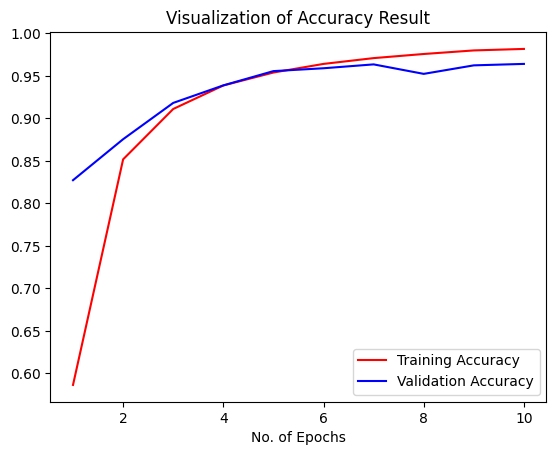

In [32]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [33]:
class_name = validation_set.class_names

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [35]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 32s 2ms/step


In [36]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [37]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [38]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [40]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.95      0.96       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       1.00      0.97      0.98       440
                                   Apple___healthy       0.94      0.97      0.95       502
                               Blueberry___healthy       0.95      1.00      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.94      0.97       421
                 Cherry_(including_sour)___healthy       0.94      0.99      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.93      0.93       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

### Confusion Matrix Visualization

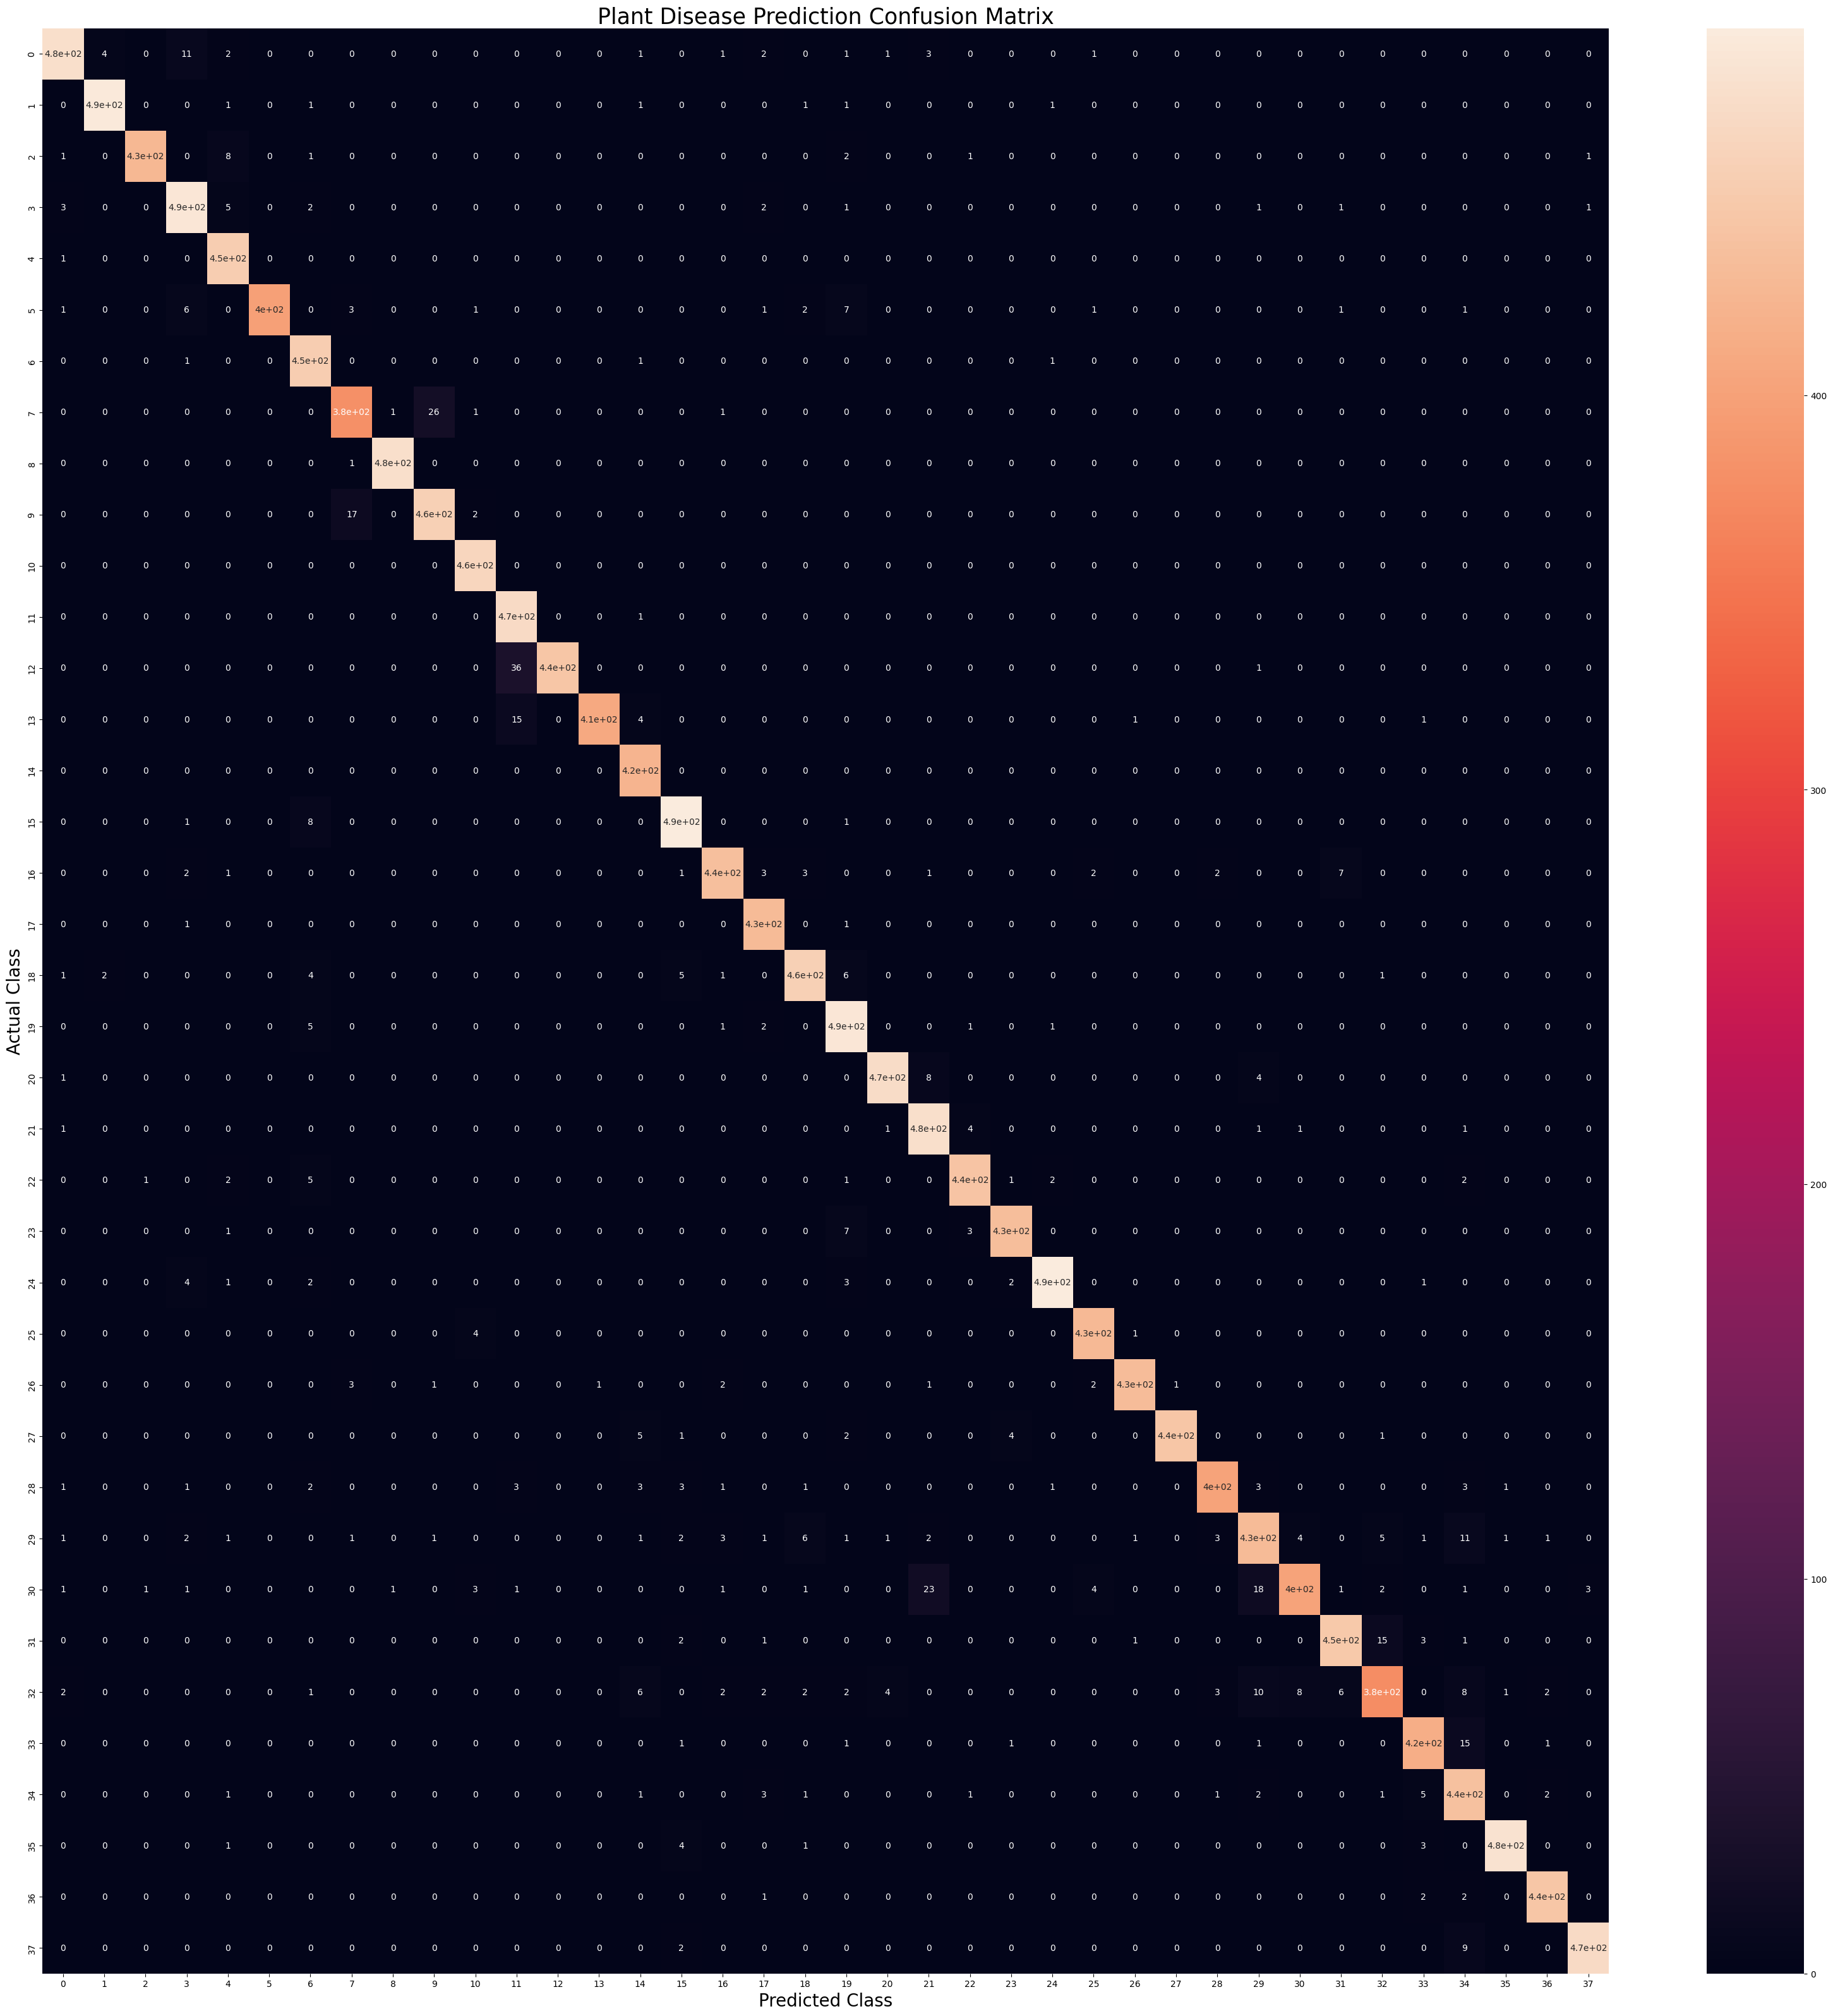

In [41]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()